In [1]:
%pip install easyocr opencv-python matplotlib


  Using cached opencv_python-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached pillow-11.0.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (9.1 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.7-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 10.0 MB/s eta 0:00:00a 0:00:01
Using cached opencv_python-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (62.5 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 10.6 MB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 10.5 MB/s eta 0:00:00a 0:00:01
Using cached kiwisolver-1.4.7-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.5 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/1

In [3]:
import easyocr

# Create an OCR reader object
reader = easyocr.Reader(['en'])

# Read text from an image
result = reader.readtext('/home/adrian/KYC-application/images/CI_Specimen2.jpg')


# Print the extracted text
for detection in result:
    print(detection[1])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


ROUMANIE
JO
MAM
ROMANIA
Didertite
Cartep
PRe
"R ooooooe
ioenad
CNP
oooooooooooT
R69o0
'hom
nn
VASILE
cnommrir
IONESCU
Gatotonlo Natlonallto
Vonait
Sex [Saxe S0r
Romana
ROU
LOC
Lieu do
lacu;
~birtn
SPECIMEN SPECIMEN
Domicllluladres9
Woo
SPECIMEN
SPECIMEN
580
PH
Emtsa delDeli
parikasued
O0.00.00-00.00.0O00
alabiltaloy
S.PCLEP_
IdRoU<<<<<<<SPECIMEN<<<<<<<<<<<<<<
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


In [1]:
import easyocr
import cv2
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

def annotate_and_plot_image(image_path):
    # Initialize the EasyOCR reader
    reader = easyocr.Reader(['ro'])

    # Read the input image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Error reading the image. Check the file path.")
    
    # Convert the image to RGB (for annotation)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Perform OCR
    results = reader.readtext(image_path, x_ths=1.5, y_ths=1.5, decoder = 'wordbeamsearch', rotation_info = [90, 180, 270])
    
    # Load the image into PIL for annotation
    annotated_image = Image.fromarray(image_rgb)
    draw = ImageDraw.Draw(annotated_image)

    # Optional: Load a font for better text rendering
    try:
        font = ImageFont.truetype("arial.ttf", size=20)  # Adjust size as needed
    except IOError:
        font = ImageFont.load_default()

    # Draw bounding boxes and text
    for (bbox, text, prob) in results:
        # Extract the bounding box coordinates
        (top_left, top_right, bottom_right, bottom_left) = bbox
        top_left = tuple(map(int, top_left))
        bottom_right = tuple(map(int, bottom_right))

        # Draw the bounding box
        draw.rectangle([top_left, bottom_right], outline="red", width=2)

        # Annotate with the detected text
        draw.text(top_left, text, fill="blue", font=font)

    # Print the detected text
    for _, text, prob in results:
        print(f"{text} {prob:.2f}")

    # Plot the annotated image
    plt.figure(figsize=(10, 10))
    plt.imshow(annotated_image)
    plt.axis('off')  # Turn off axis
    plt.show()

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Processing: /home/adrian/KYC-application/images/CI_Specimen5.png
Progress: |██████████████████████████████████████████████████| 100.0% Complete

/home/adrian/KYC-application/.venv/lib/python3.12/site-packages/easyocr/utils.py:249: RuntimeWarning: overflow encountered in scalar add
  curr.entries[newLabeling].prTotal += prNonBlank
/home/adrian/KYC-application/.venv/lib/python3.12/site-packages/easyocr/utils.py:248: RuntimeWarning: overflow encountered in scalar add
  curr.entries[newLabeling].prNonBlank += prNonBlank
/home/adrian/KYC-application/.venv/lib/python3.12/site-packages/easyocr/utils.py:221: RuntimeWarning: overflow encountered in scalar add
  curr.entries[labeling].prTotal += prBlank + prNonBlank
/home/adrian/KYC-application/.venv/lib/python3.12/site-packages/easyocr/utils.py:219: RuntimeWarning: overflow encountered in scalar add
  curr.entries[labeling].prNonBlank += prNonBlank


1 0.61
ROUMANIE 1.00
ROMANIA 1.00
CARTE DE IDENTITATE 1.00
D'SARTFTE 0.63
IDENTIY 0.37
280518 1.00
MC 0.98
NR 1.00
SERIA 1.00
180528000000 0.97
CNP 1.00
NumelNomlLast name 0.94
MAIER 1.00
PrenumelPrenomlFirst name 0.76
CONSULTANTS 1.00
CetatenielNationalitelNationa 0.90
xaslaxasixas 0.70
Română 0.75
ROU 0.98
M 0.99
| 0.85
of blrth 0.85
| 0.92
London, United Kingdom 0.88
DomiciliulAdres 0.63
53 Fountain St, Manchester 0.98
M2 2AN, 0.94
United Kingdom 1.00
ValabilitatelValiditelValid 0.95
| 0.93
MAIER Consultants 0.91
30.12.0931.12.2019 0.63
IDROUMAIER<<CONS 0.31
MC280518<1R0U1805 0.76


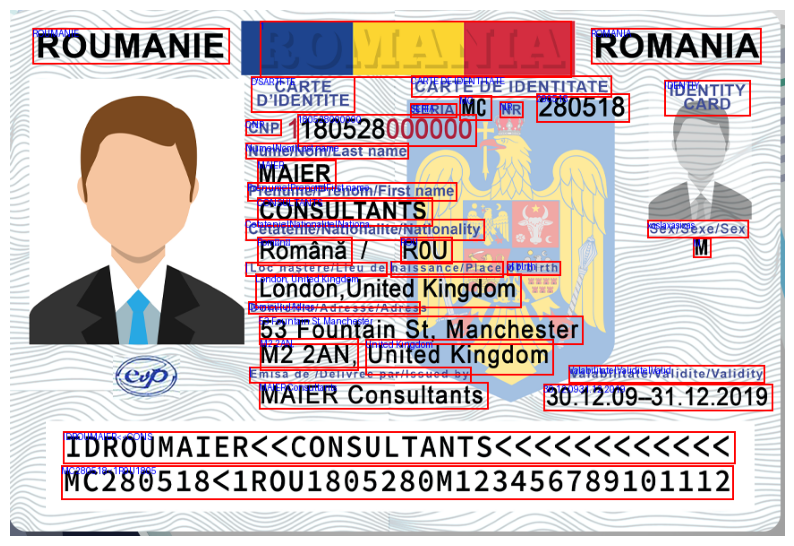

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Processing: /home/adrian/KYC-application/images/CI_Specimen6.png


/home/adrian/KYC-application/.venv/lib/python3.12/site-packages/easyocr/utils.py:249: RuntimeWarning: overflow encountered in scalar add
  curr.entries[newLabeling].prTotal += prNonBlank
/home/adrian/KYC-application/.venv/lib/python3.12/site-packages/easyocr/utils.py:248: RuntimeWarning: overflow encountered in scalar add
  curr.entries[newLabeling].prNonBlank += prNonBlank
/home/adrian/KYC-application/.venv/lib/python3.12/site-packages/easyocr/utils.py:221: RuntimeWarning: overflow encountered in scalar add
  curr.entries[labeling].prTotal += prBlank + prNonBlank
/home/adrian/KYC-application/.venv/lib/python3.12/site-packages/easyocr/utils.py:219: RuntimeWarning: overflow encountered in scalar add
  curr.entries[labeling].prNonBlank += prNonBlank


1 0.26
ROUMANIE 1.00
ROMANIA 1.00
4 0.89
CARTE 1.00
CARTE DE 0.95
8 0.79
D'IDENTITE 0.97
{ 0.65
620222400084 1.00
CNP 1.00
; 0.41
1 0.62
TIȚĂ 0.83
| 0.86
GICU-ROMEO 1.00
| 0.81
Sex/Soxe/Sex 0.94
Română 1.00
ROU 0.98
| 0.95
Mun Bucuresti Sec. 0.90
| 0.94
Mun Bucuresti Sec.6 0.68
| 0.88
847 1.00
| 0.92
| 0.74
SPCEP. Sector 6 0.81
04.03.16-22.02.2026 0.93
IDROUTITA<<GICU 0.67
RX868048<4R0u6202220M 0.81


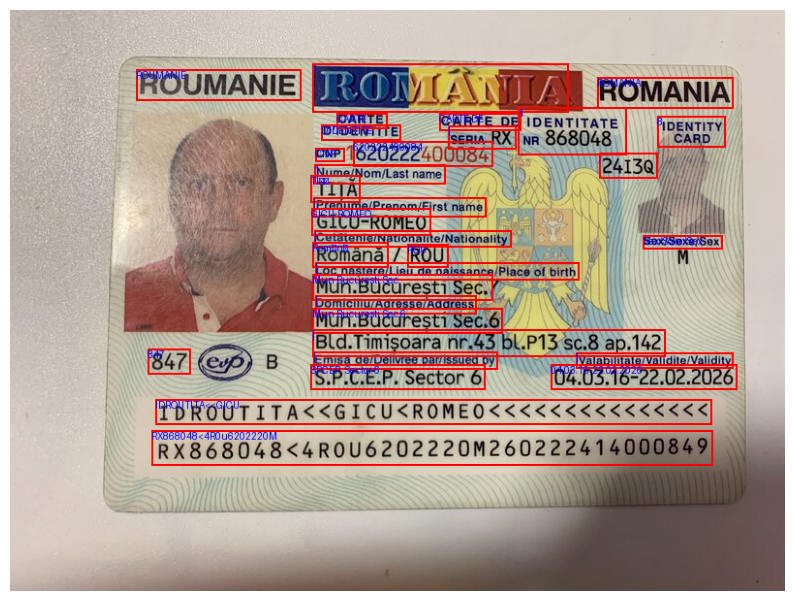

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Processing: /home/adrian/KYC-application/images/CI_Specimen1.png


/home/adrian/KYC-application/.venv/lib/python3.12/site-packages/easyocr/utils.py:221: RuntimeWarning: overflow encountered in scalar add
  curr.entries[labeling].prTotal += prBlank + prNonBlank
/home/adrian/KYC-application/.venv/lib/python3.12/site-packages/easyocr/utils.py:248: RuntimeWarning: overflow encountered in scalar add
  curr.entries[newLabeling].prNonBlank += prNonBlank
/home/adrian/KYC-application/.venv/lib/python3.12/site-packages/easyocr/utils.py:249: RuntimeWarning: overflow encountered in scalar add
  curr.entries[newLabeling].prTotal += prNonBlank
/home/adrian/KYC-application/.venv/lib/python3.12/site-packages/easyocr/utils.py:219: RuntimeWarning: overflow encountered in scalar add
  curr.entries[labeling].prNonBlank += prNonBlank
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


y1 must be greater than or equal to y0
Processing: /home/adrian/KYC-application/images/CI_Specimen2.jpg


/home/adrian/KYC-application/.venv/lib/python3.12/site-packages/easyocr/utils.py:221: RuntimeWarning: overflow encountered in scalar add
  curr.entries[labeling].prTotal += prBlank + prNonBlank
/home/adrian/KYC-application/.venv/lib/python3.12/site-packages/easyocr/utils.py:249: RuntimeWarning: overflow encountered in scalar add
  curr.entries[newLabeling].prTotal += prNonBlank
/home/adrian/KYC-application/.venv/lib/python3.12/site-packages/easyocr/utils.py:248: RuntimeWarning: overflow encountered in scalar add
  curr.entries[newLabeling].prNonBlank += prNonBlank


5 0.34
ROUMANIE 0.93
ROMANIA 1.00
Da 0.99
8 0.41
4 0.99
d1812 0.27
# 0.58
8 0.31
1 0.83
R6900 0.93
8 0.96
{ 0.72
autU 0.43
VASILE 1.00
1 0.27
IONESCU 1.00
1 0.98
| 0.53
uiluon 0.20
ROU 0.88
Română 0.94
birth 0.80
laco 0.43
5 0.81
6 0.74
SPECIMEN SPECIMEN 0.99
Domlcllluladross 0.47
{ 0.29
SPECIMEN 1.00
SPECIMEN 1.00
1 0.64
| 0.81
580 1.00
PH 0.96
1 0.99
1 0.70
S.PCLEP 0.82
| 0.42
| 0.53


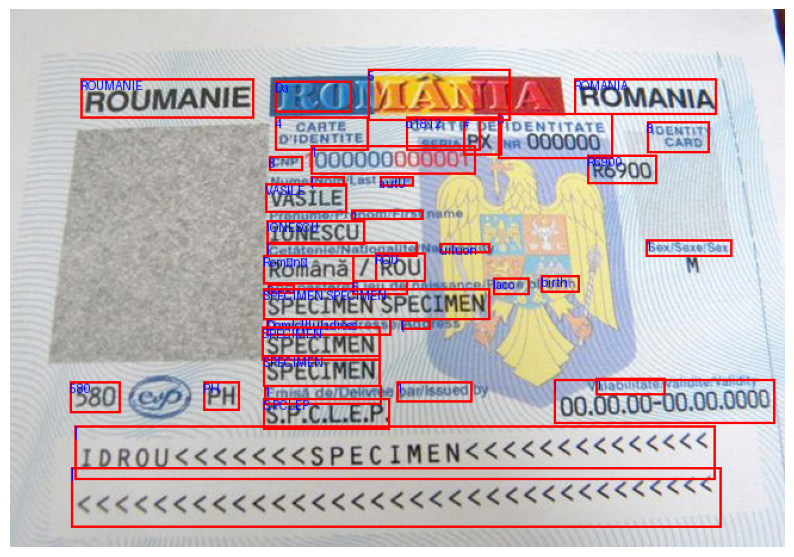

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Processing: /home/adrian/KYC-application/images/CI_Specimen4.jpg


/home/adrian/KYC-application/.venv/lib/python3.12/site-packages/easyocr/utils.py:249: RuntimeWarning: overflow encountered in scalar add
  curr.entries[newLabeling].prTotal += prNonBlank
/home/adrian/KYC-application/.venv/lib/python3.12/site-packages/easyocr/utils.py:248: RuntimeWarning: overflow encountered in scalar add
  curr.entries[newLabeling].prNonBlank += prNonBlank
/home/adrian/KYC-application/.venv/lib/python3.12/site-packages/easyocr/utils.py:221: RuntimeWarning: overflow encountered in scalar add
  curr.entries[labeling].prTotal += prBlank + prNonBlank
/home/adrian/KYC-application/.venv/lib/python3.12/site-packages/easyocr/utils.py:219: RuntimeWarning: overflow encountered in scalar add
  curr.entries[labeling].prNonBlank += prNonBlank


5 0.84
ROUMANIE 1.00
RO 0.95
ROMANIA 1.00
1 0.65
9 0.22
4 0.54
2 0.16
Yibas 0.55
2410415400342 0.76
93cOQ 0.51
VASILESCU 0.99
1 0.63
ELENA 1.00
1 0.54
8 0.62
ROU 0.99
1 0.83
1 0.54
Mun. Bucur 0.93
Sec. 0.95
Iorga 0.97
Str. Nicolae 0.97
900 1.00
06.01.17-15.04.2077 0.46
DEPAB.D 0.58
IDROUVASILEScU<<E 0.38
55099994 <0ROU4104151f7704 0.45


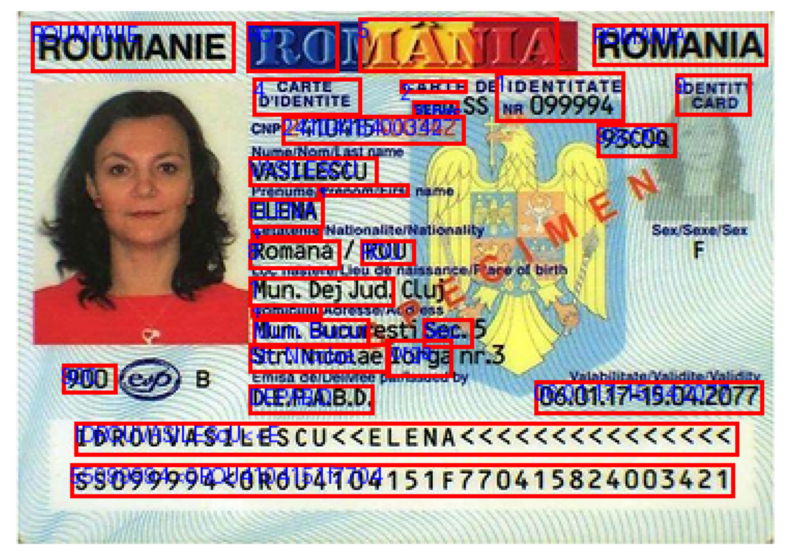

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Processing: /home/adrian/KYC-application/images/CI_Specimen7.png


/home/adrian/KYC-application/.venv/lib/python3.12/site-packages/easyocr/utils.py:249: RuntimeWarning: overflow encountered in scalar add
  curr.entries[newLabeling].prTotal += prNonBlank
/home/adrian/KYC-application/.venv/lib/python3.12/site-packages/easyocr/utils.py:248: RuntimeWarning: overflow encountered in scalar add
  curr.entries[newLabeling].prNonBlank += prNonBlank
/home/adrian/KYC-application/.venv/lib/python3.12/site-packages/easyocr/utils.py:221: RuntimeWarning: overflow encountered in scalar add
  curr.entries[labeling].prTotal += prBlank + prNonBlank
/home/adrian/KYC-application/.venv/lib/python3.12/site-packages/easyocr/utils.py:219: RuntimeWarning: overflow encountered in scalar add
  curr.entries[labeling].prNonBlank += prNonBlank


1 0.21
1 0.88
ROMANIA 1.00
| 0.33
CARTE 0.86
1 0.77
777881 1.00
1 0.86
8 0.93
XV viuas 0.49
3 1.00
5020501015564 1.00
8 0.99
95D2F 0.70
| 0.58
BALEA 1.00
| 0.82
CRISTIAN-CONSTANTIN 1.00
Sex/Sexe/Sex 0.93
| 0.67
Română 0.76
ROU 0.99
M 1.00
Loc nasterelLieu de naissancelPlace of birth 0.52
1 0.69
| 0.76
| 0.92
nr.770A 0.90
002 0.98
AB 1.00
Emisa delDelivree parllssued by 0.90
Valabilitate ValiditelValidity 0.68
29.05.20-01.05.2027 0.65
SPCLEP Abrud 1.00
IDROUBALEA<<CR 0.75
AX777881<3R0u020 0.78


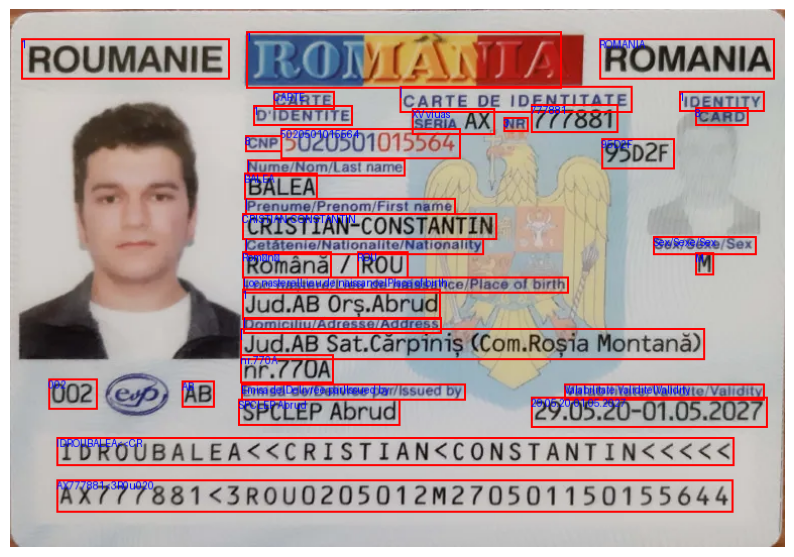

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Processing: /home/adrian/KYC-application/images/CI_Specimen3.jpg


/home/adrian/KYC-application/.venv/lib/python3.12/site-packages/easyocr/utils.py:221: RuntimeWarning: overflow encountered in scalar add
  curr.entries[labeling].prTotal += prBlank + prNonBlank
/home/adrian/KYC-application/.venv/lib/python3.12/site-packages/easyocr/utils.py:248: RuntimeWarning: overflow encountered in scalar add
  curr.entries[newLabeling].prNonBlank += prNonBlank
/home/adrian/KYC-application/.venv/lib/python3.12/site-packages/easyocr/utils.py:249: RuntimeWarning: overflow encountered in scalar add
  curr.entries[newLabeling].prTotal += prNonBlank


4 0.32
CaRTMRE 0.45
IDENFIY 0.29
D'ISERTFTE 0.34
Viyas 0.42
1640902220542 0.93
J4V5Q 0.50
2 0.74
Nume Nomilast name 0.40
DOE 1.00
1 0.80
1 0.36
JOHN 0.93
| 0.39
1 0.58
v 0.44
euewoy 0.51
gpo? 0.67
nce 0.50
1 0.79
com 0.96
Domiciliu/Adresse Add 0.68
5 1.00
pnr 0.75
Mun. 0.99
9 0.93
1 0.92
bl.632 0.52
nr.22 0.98
SC.D 0.58
ap.2 1.00
442 1.00
SI 1.00
Emisa de Dellvree parllssued by 0.51
| 0.93
06.01.17-02.09.2077 1.00
SPCLEP Iasi 0.92
| 0.55
MX6419944R0U64090 0.70


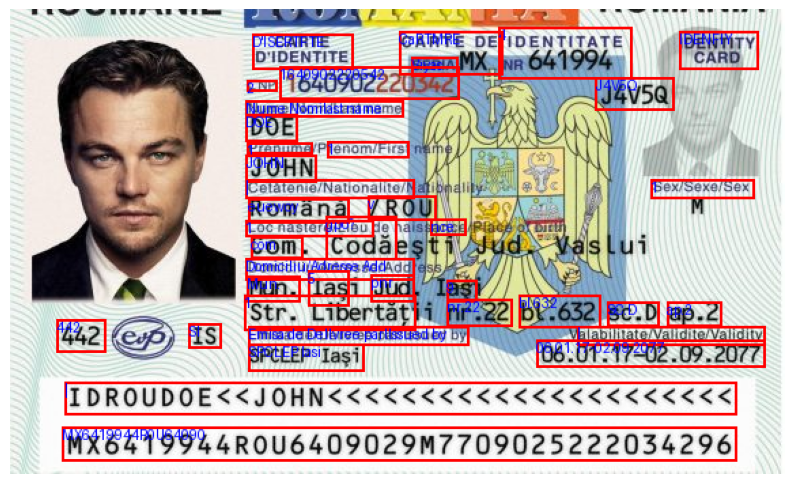

In [2]:
import os

folder_path = "/home/adrian/KYC-application/images"  
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)

    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
        print(f"Processing: {file_path}")
        try:
            annotate_and_plot_image(file_path)
        except ValueError as e:
            print(e)